In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#print("TensorFlow version:", tf.__version__)

In [2]:
TrainingSetInputs = np.load('TrainingSetInputs.npy', allow_pickle=True)
TrainingSetOutputs = np.load('TrainingSetOutputs.npy', allow_pickle=True)
TrainingSetAdditional = np.load('TrainingSetAdditional.npy', allow_pickle=True)

TestSetInputs = np.load('TestSetInputs.npy', allow_pickle=True)
TestSetOutputs = np.load('TestSetOutputs.npy', allow_pickle=True)
TestSetAdditional = np.load('TestSetAdditional.npy', allow_pickle=True)

ValidationSetInputs = np.load('ValidationSetInputs.npy', allow_pickle=True)
ValidationSetOutputs = np.load('ValidationSetOutputs.npy', allow_pickle=True)
ValidationSetAdditional = np.load('ValidationSetAdditional.npy', allow_pickle=True)


train_dataset = tf.data.Dataset.from_tensor_slices((TrainingSetInputs, TrainingSetOutputs))
test_dataset = tf.data.Dataset.from_tensor_slices((TestSetInputs, TestSetOutputs))
validation_dataset = tf.data.Dataset.from_tensor_slices((ValidationSetInputs, ValidationSetOutputs))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

Batched_train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
Batched_test_dataset = test_dataset.batch(BATCH_SIZE)
Batched_validation_dataset = test_dataset.batch(BATCH_SIZE)

In [3]:
model = keras.models.load_model("./SavedModels/my_modelV1")

In [4]:
test_loss= model.evaluate(Batched_validation_dataset)
print(test_loss)
#print(test_acc)

150/150 [==============================] - 1s 2ms/step - loss: 3.2754e-04
0.0003275449853390455


In [5]:
Gradients = np.load('Gradients.npy', allow_pickle=True)
Y_intercepts = np.load('C_Intercept.npy', allow_pickle=True)


GradientsFrequency = Gradients[6:]
Y_interceptsFerquency = Y_intercepts[6:]
#print(Gradients)
#print(Y_intercepts)

In [6]:
def Decoder(NN_Output,Thickness , ElasticModulus, Density):
    return ((ElasticModulus/Density)**0.5)*((10**((NN_Output-Y_interceptsFerquency)/GradientsFrequency))/Thickness)

In [9]:
IndexToTest = 3


DataToPredict = tf.convert_to_tensor([TestSetInputs[IndexToTest]])


thickness = TestSetAdditional[IndexToTest][0]
ElasticModulus = TestSetAdditional[IndexToTest][1]
Density = TestSetAdditional[IndexToTest][2]



thickness = (thickness-Y_intercepts[0])/Gradients[0]
ElasticModulus = (ElasticModulus-Y_intercepts[3])/Gradients[3]
Density = (Density-Y_intercepts[4])/Gradients[4]

predictions = Decoder(model.predict(DataToPredict),thickness,ElasticModulus,Density)
actual = Decoder(TestSetOutputs[IndexToTest],thickness,ElasticModulus,Density)

print(thickness,ElasticModulus,Density)

print("Prediction", predictions)
print("Actual", actual)

1/1 [==============================] - 0s 51ms/step
0.004290198274111559 229679076912.85345 6153.7136076277875
Prediction [[ 232.67773193  495.7131851   798.47954689 1042.52763697 1436.4366611
  1785.20385031 2200.16340079 2524.41741798]]
Actual [ 222.01699343  614.24168188  688.89067098 1208.38363596 1410.38090049
 2002.67287962 2194.37028364 2994.95944199]


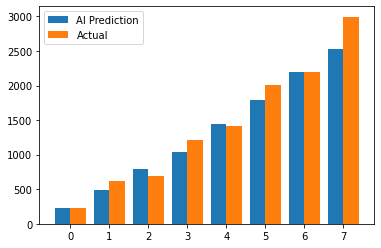

In [10]:
Frequencies = ['f1','f2','f3','f4','f5','f6','f7','f8']

plt.figure()

X_axis = np.arange(len(Frequencies))
plt.bar(X_axis-0.2, predictions[0], 0.4, label = 'AI Prediction')
plt.bar(X_axis+0.2, actual, 0.4, label = 'Actual')
#plt.grid()
plt.legend()
plt.show()